In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import pandas as pd
from datetime import datetime
import statistics

In [38]:
# Get data
data = pd.read_csv("archive.csv", sep = ',')

# Show data
data

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [39]:
def age(year, born):
    try:
        year = datetime.strptime(str(year), "%Y")
        born = datetime.strptime(str(born), "%Y-%m-%d")
        return int(year.year - born.year - ((year.month, year.day) > (born.month, born.day)))
    except:
        return 0

In [40]:
# Who gets prizes (name, gender, age)
data["Age"] = data.apply(lambda row: age(row["Year"], row["Birth Date"]), axis=1)  # Calculate age
data.loc[:, ["Full Name", "Sex", "Age"]]

,Full Name,Sex,Age
0,Jacobus Henricus van 't Hoff,Male,49
1,Sully Prudhomme,Male,62
2,Emil Adolf von Behring,Male,47
3,Jean Henry Dunant,Male,73
4,Frédéric Passy,Male,79
...,...,...,...
964,Yoshinori Ohsumi,Male,71
965,Juan Manuel Santos,Male,65
966,David J. Thouless,Male,82
967,F. Duncan M. Haldane,Male,65


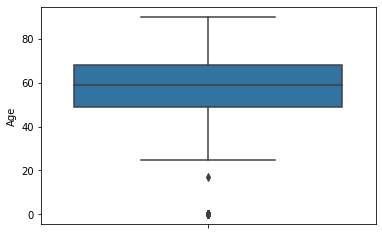

In [41]:
# Box plot age
_ = sns.boxplot(y="Age", data=data)
_ = plt.ylabel("Age")
plt.show()

In [42]:
# Oldest
data.loc[data["Age"].idxmax()]

Year                                                                 2007
Category                                                        Economics
Prize                   The Sveriges Riksbank Prize in Economic Scienc...
Motivation              "for having laid the foundations of mechanism ...
Prize Share                                                           1/3
Laureate ID                                                           820
Laureate Type                                                  Individual
Full Name                                                  Leonid Hurwicz
Birth Date                                                     1917-08-21
Birth City                                                         Moscow
Birth Country                                                      Russia
Sex                                                                  Male
Organization Name                                 University of Minnesota
Organization City                     

In [82]:
# Youngest
youngest = data.loc[data["Age"] > 0].min()
print(youngest)
youngest_age = youngest["Age"]

Year                                   1901
Category                          Chemistry
Prize            The Nobel Peace Prize 1901
Prize Share                             1/1
Laureate ID                               1
Laureate Type                    Individual
Full Name                   Aage Niels Bohr
Birth Date                       1817-11-30
Birth Country                     Argentina
Sex                                  Female
Age                                      17
dtype: object


C:\Users\janth\AppData\Local\Temp/ipykernel_8208/305066942.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  youngest = data.loc[data["Age"] > 0].min()


In [44]:
# > 1 noble prizes
data[data.duplicated(["Full Name"])]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Age
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,54
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,44
158,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,Germany,Male,I.G. Farbenindustrie A.G.,Heidelberg,Germany,1940-04-26,Heidelberg,Germany,57
160,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",Germany (Poland),Male,I.G. Farbenindustrie A.G.,Mannheim-Rheinau,Germany,1949-03-30,Buenos Aires,Argentina,47
180,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,"""for their discoveries concerning liver therap...",1/3,328,Individual,William Parry Murphy,1892-02-06,"Stoughton, WI",United States of America,Male,Peter Brent Brigham Hospital,"Boston, MA",United States of America,1987-10-09,"Brookline, MA",United States of America,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,886,Individual,Thomas C. Südhof,1955-12-22,Göttingen,Germany,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN,58
932,2014,Chemistry,The Nobel Prize in Chemistry 2014,"""for the development of super-resolved fluores...",1/3,910,Individual,Stefan W. Hell,1962-12-23,Arad,Romania,Male,German Cancer Research Center,Heidelberg,Germany,NaN,NaN,NaN,52
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,Japan,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,85
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,77


In [45]:
"""
TASK 2
"""

#ECDF function
def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y

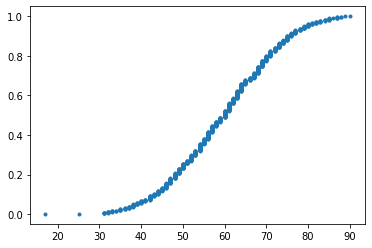

In [72]:
# ECDF for age
ages = [x for x in data["Age"] if x > 0]
ages_x, ages_y = ecdf(ages)
_ = plt.plot(ages_x, ages_y, marker='.', linestyle='none')

In [69]:
# Median for age
median_age = int(statistics.median(ages))
print(F"Median age: {median_age}")

Median age: 60


In [70]:
# Mean age
mean_age = np.mean(ages)
print(F"Mean age: {mean_age}")

Mean age: 59.48400852878465


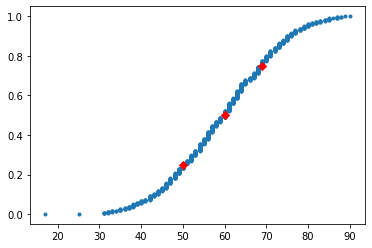

In [75]:
# Percentiles
percentiles = np.array([25, 50, 75])
ages_percentiles = np.percentile(ages, percentiles)

# Overlay ECDF and percentiles
_ = plt.plot(ages_x, ages_y, marker='.', linestyle='none')
_ = plt.plot(ages_percentiles, 
         percentiles/100, 
         marker='D', 
         color='red', 
         linestyle='none')

In [79]:
# Variance and standard deviation
"""
diffs = ages - np.mean(ages)
diffs_sq = diffs**2
var = np.mean(diffs_sq)
print(F"Own: {var}")
"""

age_variance = np.var(ages)
age_sd = np.sqrt(age_variance)
print(F"Variance: {age_variance}\nStandard Deviation: {age_sd}")

Variance: 153.0322602643196
Standard Deviation: 12.370620852015456


In [87]:
# Number of people with youngest age
num_youngest = sum(1 for x in data["Age"] if x == youngest_age)

# Probability is extremely low -> Poisson
p = num_youngest / len(data)
print(F"p for <= youngest age: {p}")

p for <= youngest age: 0.0010319917440660474


0


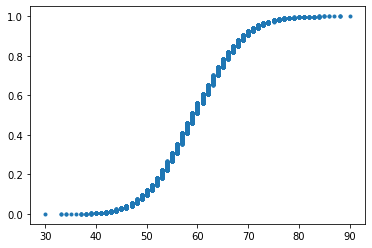

In [92]:
# Create data set with Poisson
random_ages = np.random.poisson(mean_age, size=10000)
rx, ry = ecdf(random_ages)
_ = plt.plot(rx, ry, marker='.', linestyle='none')

# Probability to get < youngest:
less = 0
for age in random_ages:
    if age < youngest_age:
        less += 1
        
